In [1]:
#%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

* Skip first 55 rows as they are just text
* Skip last 6 rows as they are post june 2019
* Remove first two values because the are empty, and we do not want to use backward filling.
* Also drop column "Date Excel" as that is not of interest.

In [3]:
filepath = '/mnt/workspace/time_series/weekly_in_situ_co2_mlo.csv'
#filepath = '/home/yohannjs/Documents/school/tidsrekker/monthly_in_situ_co2_mlo.csv'

co2DF = pd.read_csv(filepath, 
                 na_values=-99.99, 
                 skiprows=44,
                 names=['Date', 'co2'])

co2DF.Date = pd.to_datetime(co2DF['Date'], format='%Y-%m-%d') # Bytter dato til pandas-datetime format
co2DF.head()

,Date,co2
0,1958-03-29,316.19
1,1958-04-05,317.31
2,1958-04-12,317.69
3,1958-04-19,317.58
4,1958-04-26,316.48


In [4]:
co2DF.isnull().any()

Date    False
co2     False
dtype: bool

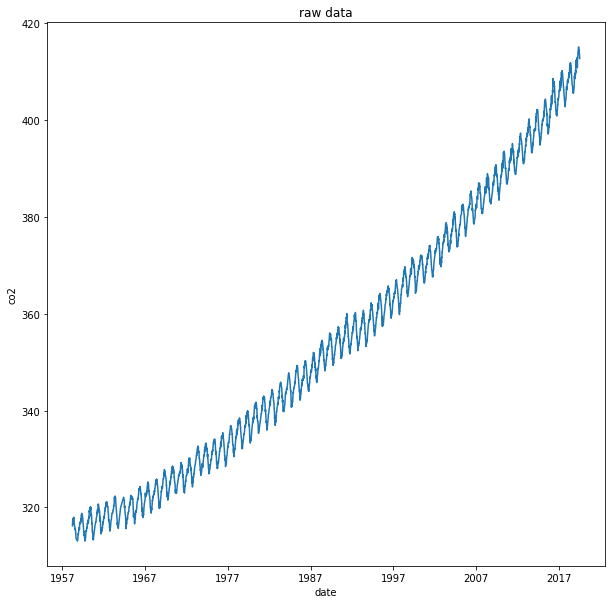

In [5]:
plt.figure(figsize=(10,10))
plt.plot(co2DF['Date'], co2DF['co2'],linestyle="-")
plt.gca().set(title='raw data', xlabel='date', ylabel='co2')
plt.show()

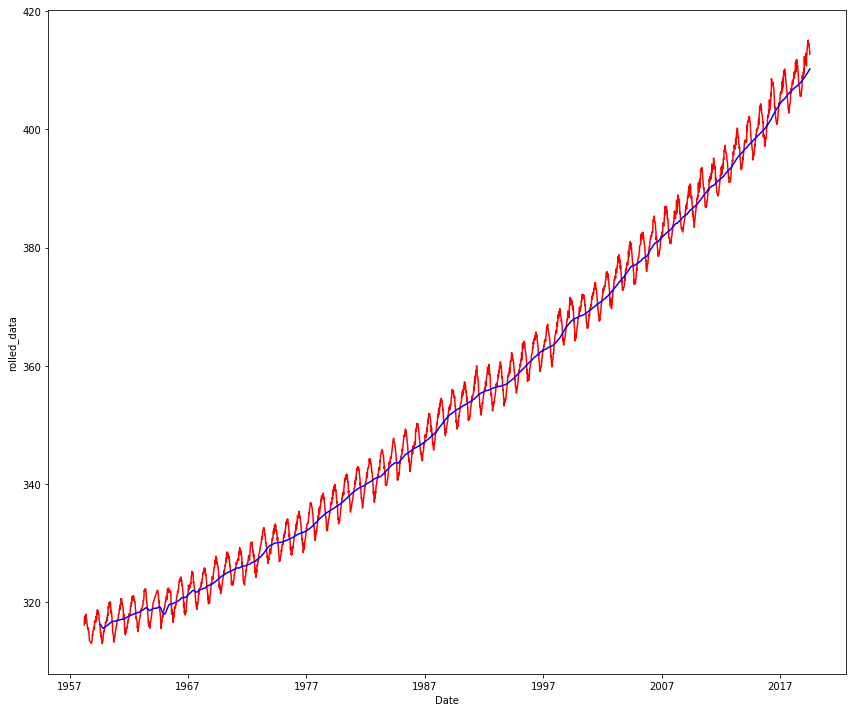

In [23]:
co2DF['rolled_data'] = co2DF['co2'].rolling(window=52).mean()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
g1 = sns.relplot(x='Date', y='co2', data=co2DF, kind='line', color='red', ax=ax)
g2 = sns.relplot(x='Date', y='rolled_data', data=co2DF, kind='line', color='blue', ax=ax)

plt.close(g1.fig)
plt.close(g2.fig)

plt.tight_layout()

In [25]:
def gen_autocorr(series):
    length_sequence = series.size
    lag = np.array(range(-length_sequence + 1, length_sequence))
    autocorr = np.correlate(series.values, series.values, mode='full')
    autocorr = autocorr / (autocorr[length_sequence - 1]) # Normalize with regard to lag = 0
    return pd.Series(lag), pd.Series(autocorr)

lag_co2, autocorr_co2 = gen_autocorr(co2DF['co2'])

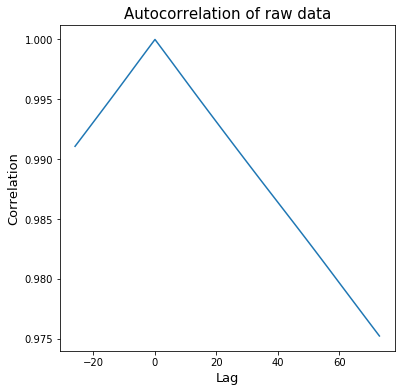

In [32]:
lim1 = 3100
lim2 = 3200

plt.figure(figsize=(6,6))
plt.plot(lag_co2[lim1:lim2], autocorr_co2[lim1:lim2])
plt.title('Autocorrelation of raw data', fontsize = 15)
plt.xlabel('Lag', fontsize=13)
plt.ylabel('Correlation', fontsize=13)
plt.show()